In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, average_precision_score, roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.utils import shuffle
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from sklearn.covariance import EllipticEnvelope
from sklearn.covariance import MinCovDet
import warnings
from sklearn.metrics import average_precision_score, roc_auc_score, matthews_corrcoef
import umap.umap_ as umap
import umap.plot

In [151]:
import dagshub
dagshub.init(repo_owner='crotelius77', repo_name='MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques', mlflow=True)
import mlflow
mlflow.set_experiment("Adrien_Models")
mlflow.autolog(disable=True)


Initialized MLflow to track repo 
"crotelius77/MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques"

Repository crotelius77/MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques initialized!

In [76]:
df_go = pd.read_csv('../data/raw/DATASET_GO_NG.csv',sep=';',decimal=',',index_col="index",dtype={'target': 'Int64'})
df_ng= pd.read_csv('../data/raw/DATASET_NG.csv',sep=';',decimal=',',index_col="index",dtype={'target': 'Int64'})
df_simu= pd.read_csv('../data/raw/DATASIMU750.csv',sep=';',decimal=',',index_col="index",dtype={'target': 'Int64'})
df_all=pd.concat([df_go,df_ng])
df_all = shuffle(df_all)
target_all=df_all["target"]
target_go=df_go["target"]
target_ng=df_ng["target"]
target_simu=df_simu["target"]
print(df_all.target.value_counts(normalize=True))
df_go.drop(["target",'moyenne', 'ecartype', 'mediane', 'min', 'max'],axis=1,inplace=True)
df_ng.drop(["target",'moyenne', 'ecartype', 'mediane', 'min', 'max'],axis=1,inplace=True)
df_simu.drop(["target"],axis=1,inplace=True)
df_all.drop(["target",'moyenne', 'ecartype', 'mediane', 'min', 'max'],axis=1,inplace=True)


target
0      0.940291
14     0.038996
2      0.004353
1      0.003845
4      0.003446
13     0.002031
6      0.001632
7       0.00156
5      0.001487
3      0.000689
20     0.000653
9      0.000363
111     0.00029
207    0.000145
27     0.000109
121    0.000109
Name: proportion, dtype: Float64


In [95]:

df=df_all
target=target_all
target = target.fillna(10000).astype(int)
with mlflow.start_run( run_name="run_1_StandardScaler",   nested=False,  tags={"project": "Anomalie_classification", "model": "StandardScaler","Data":"all"}          ):
    sc=StandardScaler()
    df_scale=sc.fit_transform(df)
    # Vérifier les types de colonnes
    print(df.dtypes)
    # Vérifier si des colonnes contiennent des valeurs non numériques
    non_numeric_columns = df.select_dtypes(include=['object', 'string']).columns
    print("Colonnes non numériques :", non_numeric_columns)
        # Enregistrer les paramètres UMAP
    # Fin du run MLflow
    mlflow.sklearn.log_model(sk_model=sc,input_example=df[:1],artifact_path="SC")
    mlflow.end_run()

2024/11/18 13:57:45 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: AttributeError("'StandardScaler' object has no attribute 'predict'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.
2024/11/18 13:57:45 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


V1_AC_down     float64
V1_vib_down    float64
V2_AC_down     float64
V2_vib_down    float64
V3_AC_down     float64
                ...   
G31_vib_up     float64
G32_AC_up      float64
G32_vib_up     float64
G33_AC_up      float64
G33_vib_up     float64
Length: 432, dtype: object
Colonnes non numériques : Index([], dtype='object')


2024/11/18 13:57:58 WARNING mlflow.models.model: Failed to validate serving input example {
  "dataframe_split": {
    "columns": [
      "V1_AC_down",
      "V1_vib_down",
      "V2_AC_down",
      "V2_vib_down",
      "V3_AC_down",
      "V3_vib_down",
      "V4_AC_down",
      "V4_vib_down",
      "V5_AC_down",
      "V5_vib_down",
      "V6_AC_down",
      "V6_vib_down",
      "V7_AC_down",
      "V7_vib_down",
      "V8_AC_down",
      "V8_vib_down",
      "V9_AC_down",
      "V9_vib_down",
      "V10_AC_down",
      "V10_vib_down",
      "V11_AC_down",
      "V11_vib_down",
      "V12_AC_down",
      "V12_vib_down",
      "V13_AC_down",
      "V13_vib_down",
      "V14_AC_down",
      "V14_vib_down",
      "V15_AC_down",
      "V15_vib_down",
      "V16_AC_down",
      "V16_vib_down",
      "V17_AC_down",
      "V17_vib_down",
      "V18_AC_down",
      "V18_vib_down",
      "V19_AC_down",
      "V19_vib_down",
      "V20_AC_down",
      "V20_vib_down",
      "V21_AC_down",
     

## UMAP

In [23]:
# Réduction de dimension avec UMAP à 2 dimensions
umap_model_2d = umap.UMAP(n_components=2,n_neighbors=4,min_dist=0.1,metric='cosine', random_state=42)
mapper=umap_model_2d.fit(df_scale)
X_reduced_2d = umap_model_2d.transform(df_scale)
umap.plot.points(mapper,width=1100, height=1100,labels=target)

d:\Adrien et Sarah\Documents\GitHub\MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\umap\plot.py:894: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

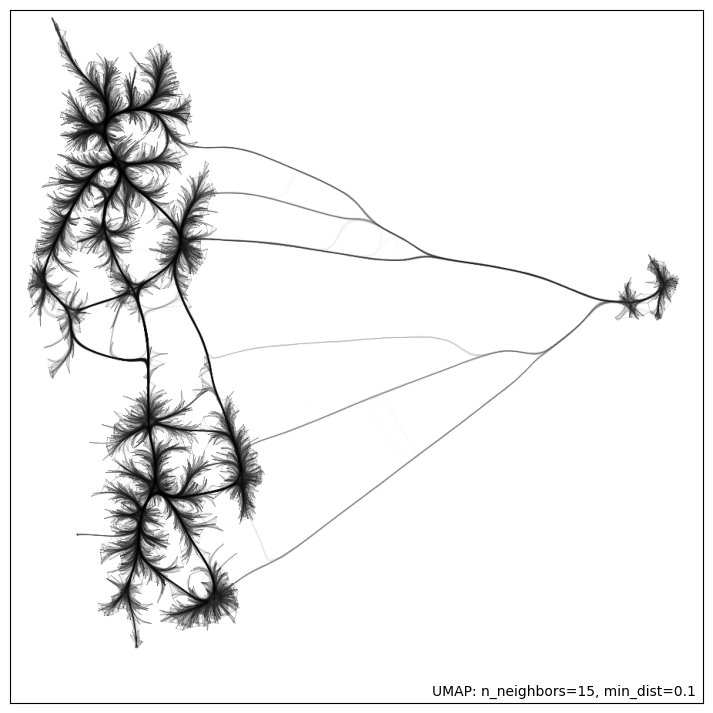

In [ ]:
umap.plot.connectivity(mapper, edge_bundling='hammer',width=900, height=900)

<Axes: >

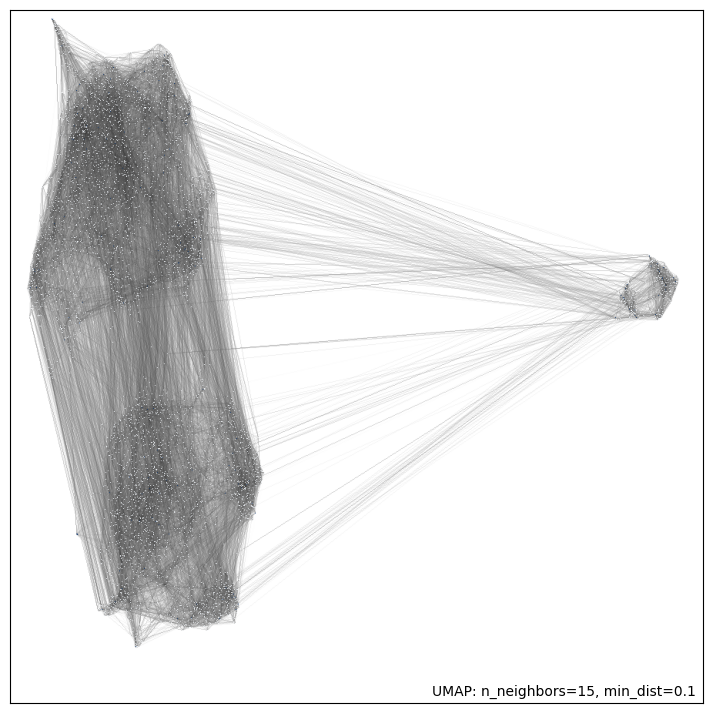

In [ ]:
umap.plot.connectivity(mapper, show_points=True,width=900, height=900)

In [90]:
# Nettoyage
targetumap = target.fillna(-1)
targetumap.replace({14:1,13:1,20:1,9:1,111:1,5:1,207:1,27:1,121:1,10000:-1}, inplace=True)
with mlflow.start_run( run_name="run_2_UMAP",   nested=False,  tags={"project": "Anomalie_classification", "model": "UMAP 10 Dim","Data":"all semi supervise"}          ):
    umap_model_10d = umap.UMAP(n_components=10,n_neighbors=4,min_dist=0.1,metric='cosine',random_state=42)#, random_state=42)
    umap_model_10d.fit(df_scale,targetumap)
    X_reduced_10d=umap_model_10d.transform(df_scale)
    # Enregistrer les paramètres UMAP
    mlflow.log_param('n_neighbors', 4)
    mlflow.log_param('n_components', 10)
    mlflow.log_param('metric', "cosine")
    # Fin du run MLflow
    mlflow.sklearn.log_model(sk_model=umap_model_10d,input_example=df_scale[:1],artifact_path="UMAP_10D")
    mlflow.end_run()


d:\Adrien et Sarah\Documents\GitHub\MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

2024/11/18 12:25:35 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: AttributeError("'UMAP' object has no attribute 'predict'"). To see the full traceback, set the logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)`. To disable automatic signature inference, set `signature` to `False` in your `log_model` or `save_model` call.
2024/11/18 12:25:39 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/18 12:27:28 WARNING mlflow.models.model: Failed to validate serving input example {
  "inputs": [
    [
      8.83938217163086,
      3.694582223892212,
      4.174931526184082,
      7.110874176025391,
      5.60

## TSNE

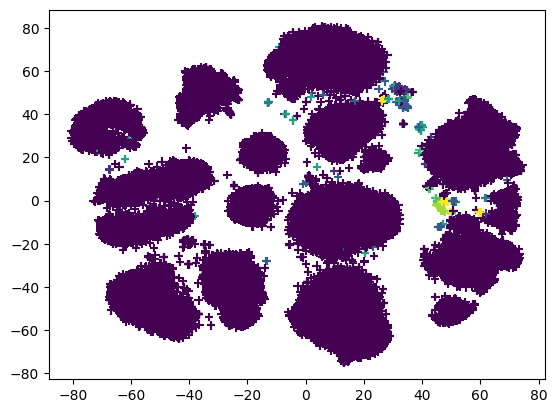

(52025, 2)

In [ ]:
tsne = TSNE(n_components=2, method = 'barnes_hut',n_jobs=-1)
df_scale = tsne.fit_transform(df_scale)
plt.scatter(df_scale[:, 0], df_scale[:, 1],c=target,marker="+")
plt.show()
df_scale.shape

C:\Users\artho\AppData\Local\Temp\ipykernel_9532\2154724325.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


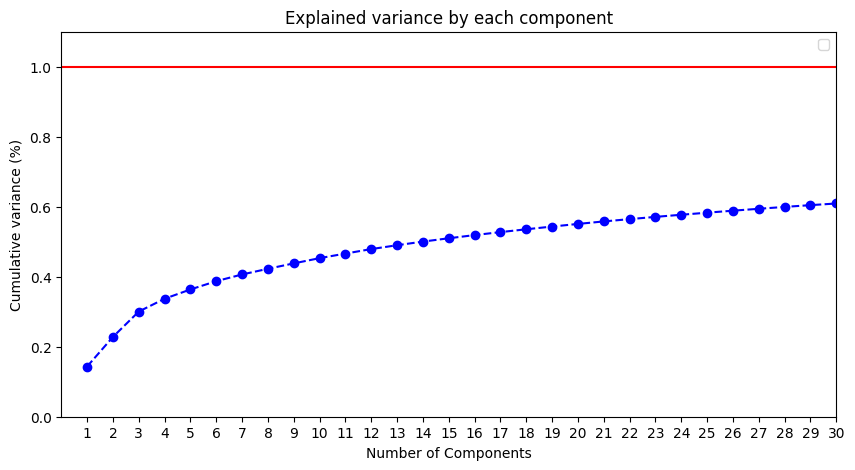

In [40]:
n_components = 30  # Limite
# PCA
pca_var = PCA()
pca_var.fit(df_scale)

# Calcul de la variance expliquée cumulée
plt.figure(figsize=(10,5))

xi = np.arange(1, n_components + 1, step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_[:n_components])
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.ylim(0.0,1.1)
plt.xlim(0, n_components)  # Limite l'axe x
plt.xlabel('Number of Components')
plt.xticks(xi)  # Ajuste les ticks à partir des indices
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
#
plt.legend()
# Afficher le graphique
plt.show()

In [93]:
with mlflow.start_run( run_name="run_10_DBSCAN",   nested=False,  tags={"project": "Anomalie_classification", "model": "DBSCAN","Data":"all"}          ):

    db = DBSCAN(eps=0.5, min_samples=240).fit(X_reduced_10d)#pour la 2d eps=0.42, min_samples=240
    y_pred = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise_ = list(y_pred).count(-1)

    dfig=pd.DataFrame({"xx":X_reduced_10d[:, 0],"yy": X_reduced_10d[:, 1],"colore":y_pred})
    fig = px.scatter(dfig,x='xx',y='yy',color="colore",hover_data=[df.index],width=1400,height=1000,symbol=target)
    fig.show()

    mlflow.log_metric('Estimated number of clusters', n_clusters_)
    mlflow.log_metric('Estimated number of noise points', n_noise_)
    mlflow.log_figure(fig, "Scatter_DBSCAN.html")  # log_figure prend la figure actuelle plt.gcf()
    mlflow.log_param('Param name', 'Value')
    # Enregistrer un exemple de données d'entrée
    mlflow.log_param('data_example', str(X_reduced_10d[:1].tolist()))
    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    x=sc.transform(df_ng)
    new_samples_reduced =umap_model_10d.transform(x)
    # Application de la fonction de prédiction sur les nouvelles données
    new_predictions = predict_dbscan_labels(db, X_reduced_10d, new_samples_reduced, eps=db.eps)
    dfig=pd.DataFrame({"xx":new_samples_reduced[:, 0],"yy": new_samples_reduced[:, 1],"colore":new_predictions})
    fig = px.scatter(dfig,x='xx',y='yy',color="colore",hover_data=[df_ng.index],width=1400,height=1000)
    new_predictions[new_predictions != -1] = 0
    mlflow.log_metric('Precision',np.abs(new_predictions.sum())/len(new_predictions))
    print("sommeypred",new_predictions.sum())
    print("moy acc",np.abs(new_predictions.sum())/len(new_predictions)*100,"%")
    if len(target)==len(y_pred):
        mlflow.log_metric('Homogeneity', metrics.homogeneity_score(target, y_pred))
        mlflow.log_metric('Completeness', metrics.completeness_score(target, y_pred))
        mlflow.log_metric('V-measure', metrics.v_measure_score(target, y_pred))
        mlflow.log_metric('Adjusted Rand Index', metrics.adjusted_rand_score(target, y_pred))
        mlflow.log_metric('Adjusted Mutual Information', metrics.adjusted_mutual_info_score(target, y_pred))
        mlflow.log_metric('Silhouette Coefficient', metrics.silhouette_score(df_scale, y_pred))
        print(f"Homogeneity: {metrics.homogeneity_score(target, y_pred):.3f}")
        print(f"Completeness: {metrics.completeness_score(target, y_pred):.3f}")
        print(f"V-measure: {metrics.v_measure_score(target, y_pred):.3f}")
        print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(target, y_pred):.3f}")
        print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(target, y_pred):.3f}" )
        print(f"Silhouette Coefficient: {metrics.silhouette_score(df_scale, y_pred):.3f}")  
    # Fin du run MLflow
    mlflow.end_run()

2024/11/18 12:37:23 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/18 12:37:23 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/11/18 12:37:23 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/18 12:37:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Estimated number of clusters: 18
Estimated number of noise points: 1787


2024/11/18 12:37:32 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/18 12:37:32 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/11/18 12:37:32 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/18 12:37:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 12:37:38 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations 

sommeypred -415
moy acc 89.6328293736501 %
Homogeneity: 0.687
Completeness: 0.214
V-measure: 0.326
Adjusted Rand Index: 0.104
Adjusted Mutual Information: 0.325
Silhouette Coefficient: 0.038


2024/11/18 12:38:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run run_10_DBSCAN at: https://dagshub.com/crotelius77/MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques.mlflow/#/experiments/1/runs/1672b22337e24935aa43f8ccf2d48c4c.
2024/11/18 12:38:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/crotelius77/MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques.mlflow/#/experiments/1.


test sur le fichier NG avec label verifier

In [68]:
def predict_dbscan_labels(dbscan_model, known_data, new_data, eps=0.5):
    """
    Fonction pour prédire l'étiquette DBSCAN de nouvelles données,
    en calculant la distance entre chaque point et les clusters existants.
    """
    from sklearn.neighbors import NearestNeighbors

    # Calcul des voisins les plus proches dans les données connues
    neighbors = NearestNeighbors(radius=eps)
    neighbors.fit(known_data)

    # On cherche les indices des points du cluster le plus proche (ou anomalie si isolé)
    distances, indices = neighbors.radius_neighbors(new_data)
    predictions = []

    for dist, idx in zip(distances, indices):
        # Filtrer les indices ayant une étiquette différente de -1
        cluster_labels = db.labels_[idx]
        cluster_labels = cluster_labels[cluster_labels != -1]  # Exclure les anomalies

        if len(cluster_labels) > 0:  # Si des voisins de clusters sont trouvés
            # Prend la majorité des labels des voisins trouvés
            pred_label = np.argmax(np.bincount(cluster_labels))
        else:
            pred_label = -1  # Aucun voisin trouvé -> Anomalie
        predictions.append(pred_label)

    return np.array(predictions)

# Transformation de nouvelles données avec le modèle UMAP
#x=df_ng.drop(columns="target")
x=sc.transform(df_ng)
new_samples_reduced =umap_model_10d.transform(x)

# Application de la fonction de prédiction sur les nouvelles données
new_predictions = predict_dbscan_labels(db, X_reduced_10d, new_samples_reduced, eps=db.eps)
dfig=pd.DataFrame({"xx":new_samples_reduced[:, 0],"yy": new_samples_reduced[:, 1],"colore":new_predictions})
fig = px.scatter(dfig,x='xx',y='yy',color="colore",hover_data=[df_ng.index],width=1400,height=1000)
new_predictions[new_predictions != -1] = 0
print("sommeypred",new_predictions.sum())
print("moy acc",np.abs(new_predictions.sum())/len(new_predictions))
fig.show()

sommeypred -428
moy acc 0.9244060475161987


test sur le fichier simu avec label verifier

In [77]:
x=sc.transform(df_simu)
new_samples_reduced =umap_model_10d.transform(x)

# Application de la fonction de prédiction sur les nouvelles données
new_predictions = predict_dbscan_labels(db, X_reduced_10d, new_samples_reduced, eps=db.eps)
dfig=pd.DataFrame({"xx":new_samples_reduced[:, 0],"yy": new_samples_reduced[:, 1],"colore":new_predictions})
fig = px.scatter(dfig,x='xx',y='yy',color="colore",hover_data=[df_simu.index],width=1400,height=1000,symbol=target_simu.fillna(10000))
new_predictions[new_predictions != -1] = 0
print("sommeypred",new_predictions.sum())
print("moy acc",np.abs(new_predictions.sum())/len(new_predictions)*100,"%")
fig.show()

sommeypred -508
moy acc 3.875200244107102 %


# MODELE ROBUST COVARIANCE

In [ ]:
outliers_fraction = 0.01
warnings.filterwarnings("ignore")
el = EllipticEnvelope(contamination = outliers_fraction, support_fraction = 0.9)

In [ ]:
el.fit(pcadata)
y_pred = el.predict(pcadata)

print("nerror",(y_pred!=target).sum())
print("sommeypred",y_pred.sum())
print("Accuracy score: {}".format(accuracy_score(target, y_pred)))
print("Classification report :\n {}".format(classification_report(target, y_pred)))
print("Matrice de confusion:\n", confusion_matrix(target, y_pred))
print("#"*50)
print("ROC-AUC Score:", roc_auc_score(target, y_pred))
print("#"*50)
print("MCC Score:", matthews_corrcoef(target, y_pred))

nerror 510
sommeypred 521
Accuracy score: 0.9901970206631427
Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     51562
           1       0.45      0.51      0.48       463

    accuracy                           0.99     52025
   macro avg       0.73      0.75      0.74     52025
weighted avg       0.99      0.99      0.99     52025

Matrice de confusion:
 [[51278   284]
 [  226   237]]
##################################################
ROC-AUC Score: 0.7531855587389478
##################################################
MCC Score: 0.47762269826733295


Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=50000, contamination=0.05)
model.fit(df_go)
y_pred = model.predict(df_ng)  # -1 pour anomalie, 1 pour normal
y_pred[y_pred == 1] = 0
print("nerror",(y_pred!=target_ng).sum())
print("sommeypred",y_pred.sum())
print("Accuracy score: {}".format(accuracy_score(target_ng, y_pred)))
print("Classification report :\n {}".format(classification_report(target_ng, y_pred)))
print("Matrice de confusion:\n", confusion_matrix(target_ng, y_pred))
print("#"*50)

y_pred = model.predict(df_go)  # -1 pour anomalie, 1 pour normal
y_pred[y_pred == 1] = 0
print("nerror",(y_pred!=target_go).sum())
print("sommeypred",y_pred.sum())
print("Accuracy score: {}".format(accuracy_score(target_go, y_pred)))
print("Classification report :\n {}".format(classification_report(target_go, y_pred)))
print("Matrice de confusion:\n", confusion_matrix(target_go, y_pred))


nerror 77
sommeypred -386
Accuracy score: 0.8336933045356372
Classification report :
               precision    recall  f1-score   support

          -1       1.00      0.83      0.91       463
           0       0.00      0.00      0.00         0

    accuracy                           0.83       463
   macro avg       0.50      0.42      0.45       463
weighted avg       1.00      0.83      0.91       463

Matrice de confusion:
 [[386  77]
 [  0   0]]
##################################################


d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


nerror 2579
sommeypred -2579
Accuracy score: 0.9499825452852876
Classification report :
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.95      0.97     51562

    accuracy                           0.95     51562
   macro avg       0.50      0.47      0.49     51562
weighted avg       1.00      0.95      0.97     51562

Matrice de confusion:
 [[    0     0]
 [ 2579 48983]]


d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


One-Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='rbf', nu=0.1)
model.fit(df_scale)
y_pred = model.predict(df_ng)  # -1 pour anomalie, 1 pour normal
y_pred[y_pred == 1] = 0
print("nerror",(y_pred!=target_ng).sum())
print("sommeypred",y_pred.sum())
print("Accuracy score: {}".format(accuracy_score(target_ng, y_pred)))
print("Classification report :\n {}".format(classification_report(target_ng, y_pred)))
print("Matrice de confusion:\n", confusion_matrix(target_ng, y_pred))
print("#"*50)
print("ROC-AUC Score:", roc_auc_score(target_ng, y_pred))
print("#"*50)
print("MCC Score:", matthews_corrcoef(target_ng, y_pred))


d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneClassSVM was fitted without feature names
  warnings.warn(


nerror 0
sommeypred -463
Accuracy score: 1.0
Classification report :
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       463

    accuracy                           1.00       463
   macro avg       1.00      1.00      1.00       463
weighted avg       1.00      1.00      1.00       463

Matrice de confusion:
 [[463]]
##################################################


d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
y_pred = model.predict(sc.transform(df_ng))  # -1 pour anomalie, 1 pour normal
y_pred[y_pred == 1] = 0
print("nerror",(y_pred!=target_ng).sum())
print("sommeypred",y_pred.sum())
print("Accuracy score: {}".format(accuracy_score(target_ng, y_pred)))
print("Classification report :\n {}".format(classification_report(target_ng, y_pred)))
print("Matrice de confusion:\n", confusion_matrix(target_ng, y_pred))
print("#"*50)

nerror 403
sommeypred -60
Accuracy score: 0.12958963282937366
Classification report :
               precision    recall  f1-score   support

          -1       1.00      0.13      0.23       463
           0       0.00      0.00      0.00         0

    accuracy                           0.13       463
   macro avg       0.50      0.06      0.11       463
weighted avg       1.00      0.13      0.23       463

Matrice de confusion:
 [[ 60 403]
 [  0   0]]
##################################################


d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LOF (Local Outlier Factor)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(n_neighbors=190, contamination=0.06,novelty=True)
model.fit(df_scale)  # -1 pour anomalie, 1 pour normal
#y_pred = model.predict(df_scale)
y_pred[y_pred == 1] = 0
print("nerror",(y_pred!=target).sum())
print("sommeypred",y_pred.sum())
print("Accuracy score: {}".format(accuracy_score(target, y_pred)))
print("Classification report :\n {}".format(classification_report(target, y_pred)))
print("Matrice de confusion:\n", confusion_matrix(target, y_pred))



nerror 3048
sommeypred -3048
Accuracy score: 0.9408866995073891
Classification report :
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.94      0.97     51562

    accuracy                           0.94     51562
   macro avg       0.50      0.47      0.48     51562
weighted avg       1.00      0.94      0.97     51562

Matrice de confusion:
 [[    0     0]
 [ 3048 48514]]


d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Adrien et Sarah\Documents\GitHub\CNI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_pred = model.predict(sc.transform(df_ng))  # -1 pour anomalie, 1 pour normal
y_pred[y_pred == 1] = 0
print("sommeypred",y_pred.sum())
print("moy acc",np.abs(y_pred.sum())/len(target_ng))

sommeypred -430
moy acc 0.9287257019438445


In [ ]:
y_pred = model.decision_function(sc.transform(df_go))  # -1 pour anomalie, 1 pour normal
#
print("sommeypred",y_pred.sum())
print("moy acc",np.abs(y_pred.sum())/len(target_ng))
y_pred

sommeypred 6319.580526074435
moy acc 13.649202000160766


array([0.17038355, 0.16902736, 0.18060158, ..., 0.17298496, 0.17717699,
       0.07150451])

In [140]:

def import_dataset(file_path, **kwargs):
    return pd.read_csv(file_path, **kwargs)

input_filepath='../data/processed'
fX_train = f"{input_filepath}/X_train_scaled.csv"
f_ytrain = f"{input_filepath}/y_train.csv"
fX_test = f"{input_filepath}/X_test_scaled.csv"
f_ytest = f"{input_filepath}/y_test.csv"
    # Import datasets
X_train = import_dataset(fX_train,header=None)
y_train = import_dataset(f_ytrain)
X_test = import_dataset(fX_test,header=None)
y_test = import_dataset(f_ytest)

In [109]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.semi_supervised import LabelSpreading

# Séparation en données étiquetées et non étiquetées
X_labeled=X_train.loc[np.array(y_train<10000)]
X_unlabeled=X_train.loc[np.array(y_train==10000)]
y_labeled=y_train.loc[np.array(y_train<10000)]


# Etiquetage des observations non labellisées
y_train = y_train.replace({10000:-1})
# 2. Étape supervisée : Apprentissage supervisé avec les données étiquetées
# Création du classifier et construction du modèle sur les données d'entraînement
label_model = LabelSpreading(n_neighbors=7, kernel='knn', max_iter=10, gamma=0.20)
label_model.fit(X_train, y_train)

2024/11/18 17:44:59 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '994b7128f6b14778866c1a339962b045', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
d:\Adrien et Sarah\Documents\GitHub\MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

d:\Adrien et Sarah\Documents\GitHub\MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning:

invalid value encountered in divide

d:\Adrien et Sarah\Documents\GitHub\MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.

LabelSpreading(gamma=0.2, kernel='knn', max_iter=10)

In [114]:
ypred=label_model.predict(X_test)
pd.crosstab(np.array(y_test),ypred)

d:\Adrien et Sarah\Documents\GitHub\MLOps_Detection_Anomalies_Acoustiques_Et_Vibratoires_Moteurs_Electriques\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning:

invalid value encountered in divide



ValueError: All arrays must be of the same length

In [133]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Dense,InputLayer
from tensorflow.keras import Metric
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Taille de l'entrée (nombre de composantes FFT réelles)
input_dim = X_train.shape[1]  # Correspond à la longueur du vecteur FFT réel
print(input_dim)

# Créer l'architecture de l'autoencodeur

input_layer = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_layer)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(50, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='sigmoid')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')#mean_squared_error
autoencoder.summary()


early_stopping = EarlyStopping(monitor = 'loss',
                                        patience = 15,
                                        mode = 'min',
                                        restore_best_weights = True)

lr_plateau = ReduceLROnPlateau(monitor = 'loss',
                                        patience=5,
                                        factor=0.5,
                                        verbose=2,
                                        mode='min',
                                        min_lr = 1e-10) # type: ignore
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='loss',
    mode='min',
    save_best_only=True)

432


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 432)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       110,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 50)             │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 432)            │       111,024 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,770 (1.15 MB)

 Trainable params: 300,770 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
# Entraîner le modèle sur les données FFT
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=32,callbacks=[model_checkpoint_callback,lr_plateau,early_stopping])

2024/11/18 18:42:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1f6d091910bc4526a1318c17d12d9368', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/11/18 18:42:02 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'pandas.core.frame.DataFrame'>. Dataset logging skipped.


Epoch 1/20
1525/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8568

2024/11/18 18:42:08 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8563 - learning_rate: 0.0010
Epoch 2/20
1524/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7554

2024/11/18 18:42:11 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7553 - learning_rate: 0.0010
Epoch 3/20
1525/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7416

2024/11/18 18:42:15 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7416 - learning_rate: 0.0010
Epoch 4/20
1525/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7336

2024/11/18 18:42:18 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7336 - learning_rate: 0.0010
Epoch 5/20
1535/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7334

2024/11/18 18:42:21 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7333 - learning_rate: 0.0010
Epoch 6/20
1518/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7221

2024/11/18 18:42:25 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7220 - learning_rate: 0.0010
Epoch 7/20
1528/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7066

2024/11/18 18:42:29 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7066 - learning_rate: 0.0010
Epoch 8/20
1524/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7230

2024/11/18 18:42:32 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7229 - learning_rate: 0.0010
Epoch 9/20
1534/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6928

2024/11/18 18:42:36 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6929 - learning_rate: 0.0010
Epoch 10/20
1525/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7013

2024/11/18 18:42:39 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7013 - learning_rate: 0.0010
Epoch 11/20
1522/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6788

2024/11/18 18:42:43 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6791 - learning_rate: 0.0010
Epoch 12/20
1536/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6795

2024/11/18 18:42:46 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6795 - learning_rate: 0.0010
Epoch 13/20
1534/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6912

2024/11/18 18:42:50 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6913 - learning_rate: 0.0010
Epoch 14/20
1538/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7005

2024/11/18 18:42:53 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7005 - learning_rate: 0.0010
Epoch 15/20
1537/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6845

2024/11/18 18:42:56 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6845 - learning_rate: 0.0010
Epoch 16/20
1518/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7055

2024/11/18 18:43:00 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.7053 - learning_rate: 0.0010
Epoch 17/20
1518/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6740

2024/11/18 18:43:04 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6741 - learning_rate: 0.0010
Epoch 18/20
1531/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6960

2024/11/18 18:43:07 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6959 - learning_rate: 0.0010
Epoch 19/20
1527/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6861

2024/11/18 18:43:11 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6861 - learning_rate: 0.0010
Epoch 20/20
1522/1540 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6742

2024/11/18 18:43:14 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


1540/1540 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6743 - learning_rate: 0.0010


2024/11/18 18:43:14 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: Cannot log input example or model signature for input with type <class 'pandas.core.frame.DataFrame'>. TensorFlow Keras autologging can only log input examples and model signatures for the following input types: numpy.ndarray, dict[string -> numpy.ndarray], tensorflow.keras.utils.Sequence, and tensorflow.data.Dataset (TensorFlow >= 2.1.0 required)
2024/11/18 18:43:14 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/11/18 18:43:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/18 18:43:27 INFO mlflow.tracking._tracking_service.cl

KeyError: 'val_loss'

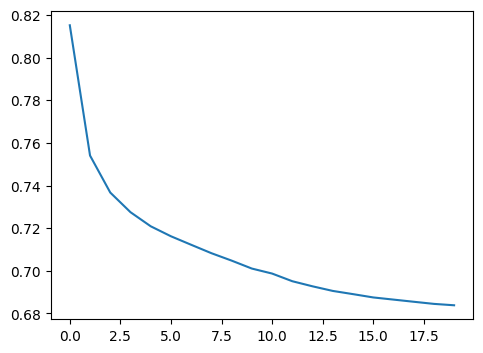

In [135]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model_loss_by_epoch")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='right')

In [136]:
# Prédire et calculer l'erreur de reconstruction pour la détection d'anomalies
X_test_reconstructed = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.square(X_test - X_test_reconstructed), axis=1)
threshold = np.percentile(reconstruction_error, 97)
anomalies = reconstruction_error > threshold

print("Anomalies détectées:", anomalies)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Anomalies détectées: 0       False
1       False
2       False
3       False
4       False
        ...  
2752    False
2753    False
2754    False
2755    False
2756    False
Length: 2757, dtype: bool


In [137]:
import numpy as np

# Prédire les reconstructions pour les segments de test
X_test_reconstructed = autoencoder.predict(X_test)

# Calculer l'erreur de reconstruction (erreur quadratique moyenne)
reconstruction_error = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

# Définir un seuil pour l'erreur de reconstruction (ex: 95e percentile des erreurs de reconstruction)
threshold = np.percentile(reconstruction_error, 95)

# Identifier les anomalies (les segments dont l'erreur dépasse le seuil)
anomalies = reconstruction_error > threshold

# Calculer le pourcentage d'anomalies
anomaly_percentage = (np.sum(anomalies) / len(anomalies)) * 100

# Afficher le pourcentage d'anomalies détectées
print(f"Anomalies détectées: {anomaly_percentage:.2f}%")

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step
Anomalies détectées: 5.01%


In [139]:
y_pred=anomalies.astype(int)
y_pred[y_pred == 1] = -1
print("Rapport de classification : \n",classification_report(y_test,y_pred),"\n")


Rapport de classification : 
               precision    recall  f1-score   support

          -1       0.46      0.38      0.42       165
           0       0.96      0.97      0.97      2592

    accuracy                           0.94      2757
   macro avg       0.71      0.68      0.69      2757
weighted avg       0.93      0.94      0.93      2757
 



In [141]:
# Séparation en données étiquetées et non étiquetées
X_labeled=X_train.loc[np.array(y_train<10000)]
X_unlabeled=X_train.loc[np.array(y_train==10000)]
y_labeled=y_train.loc[np.array(y_train<10000)]

0 2
1 4
2 6
3 8


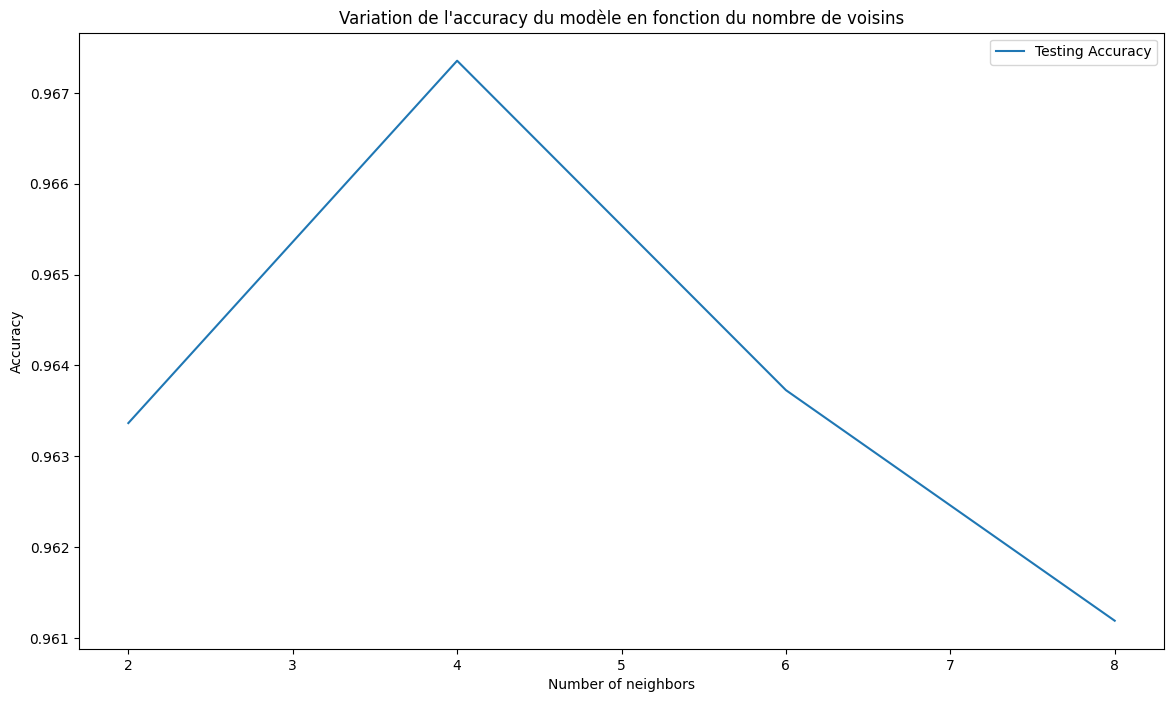

In [167]:
neighbours = np.arange(2,10,2)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))
from sklearn.neighbors import KNeighborsClassifier
for i,k in enumerate(neighbours):
    print(i,k)
    knn = KNeighborsClassifier(n_neighbors = k,algorithm="kd_tree",n_jobs=-1)
    knn.fit(X_labeled,y_labeled)
    #train_accuracy[i] = knn.score(X_labeled, y_labeled)
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title("Variation de l'accuracy du modèle en fonction du nombre de voisins")
plt.plot(neighbours, test_accuracy, label = 'Testing Accuracy')
#plt.plot(neighbours, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [170]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1) #n_jobs=-1 signifie que l'on utilise tous les processeurs lors de la recherche de voisins means
knn.fit(X_labeled,y_labeled)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=np.int64(4))

InvalidIndexError: (slice(None, None, None), 0)

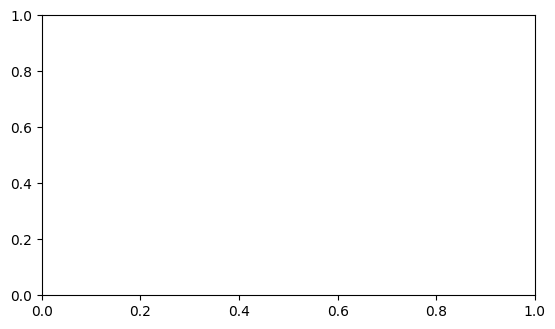

In [171]:
knn_predicted_test_labels=knn.predict(X_test)

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [172]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
print("Valeur de l'accuracy:", knn_accuracy_score)

Valeur de l'accuracy: 0.9673558215451578


In [173]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predicted_test_labels))

              precision    recall  f1-score   support

          -1       0.89      0.52      0.65       165
           0       0.97      1.00      0.98      2592

    accuracy                           0.97      2757
   macro avg       0.93      0.76      0.82      2757
weighted avg       0.97      0.97      0.96      2757



In [174]:
from sklearn.metrics import confusion_matrix, roc_auc_score, matthews_corrcoef, average_precision_score
print("Matrice de confusion:\n", confusion_matrix(y_test, knn_predicted_test_labels))
print("#"*50)
print("ROC-AUC SCORE:", roc_auc_score(y_test, knn_predicted_test_labels))
print("#"*50)
print("MCC Score:", matthews_corrcoef(y_test, knn_predicted_test_labels))
print("#"*50)
print("Precision-recall Score:", average_precision_score(y_test, knn_predicted_test_labels))

Matrice de confusion:
 [[  85   80]
 [  10 2582]]
##################################################
ROC-AUC SCORE: 0.7556467452300786
##################################################
MCC Score: 0.6649115943971835
##################################################


ValueError: pos_label=1 is not a valid label. It should be one of [-1, 0]